https://github.com/sdasadia/Oil-Price-Prediction/blob/master/Oil%20Price%20Forecast.ipynb

https://github.com/sergeyivanov01/PHBS_MLF_2018/blob/master/BP2018.py

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import math
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('seaborn-darkgrid')

In [2]:
%store -r data_EFA

In [3]:
X = data_EFA.values
size = int(len(X) * 0.6)

In [4]:
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = ts_log.rolling(1).mean()
#     rolstd = ts_log.rolling(1).std()

#     #Plot rolling statistics:
#     orig = plt.plot(ts, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

In [5]:
#print(data)

In [6]:
#ts = data

In [7]:
train, test = X[0:size], X[size:len(X)]


In [8]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=58.344481, expected=57.373047
predicted=57.480314, expected=57.871342


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


predicted=57.915621, expected=57.740211
predicted=57.813802, expected=57.469215
predicted=57.559745, expected=56.875412
predicted=56.999897, expected=57.159882
predicted=57.245821, expected=58.057716
predicted=58.093228, expected=56.795403
predicted=56.955987, expected=57.586571
predicted=57.643452, expected=57.435455
predicted=57.536861, expected=56.893188
predicted=57.031170, expected=53.212910
predicted=53.581825, expected=53.710724
predicted=53.920885, expected=51.212761
predicted=51.604399, expected=52.839550
predicted=53.013827, expected=52.288395
predicted=52.577213, expected=51.052746
predicted=51.399363, expected=51.986153
predicted=52.202761, expected=54.270771
predicted=54.376031, expected=54.457455
predicted=54.649188, expected=55.186398
predicted=55.332245, expected=54.324104
predicted=54.568100, expected=54.172981
predicted=54.389699, expected=52.706207
predicted=53.022798, expected=54.155205
predicted=54.296496, expected=53.959637
predicted=54.184620, expected=54.084084


predicted=63.545997, expected=62.061165


In [9]:
error_EFA = math.sqrt(mean_squared_error(test, predictions))
%store error_EFA
print('Test RMSE: %.3f' % error_EFA)

Stored 'error_EFA' (float)
Test RMSE: 1.137


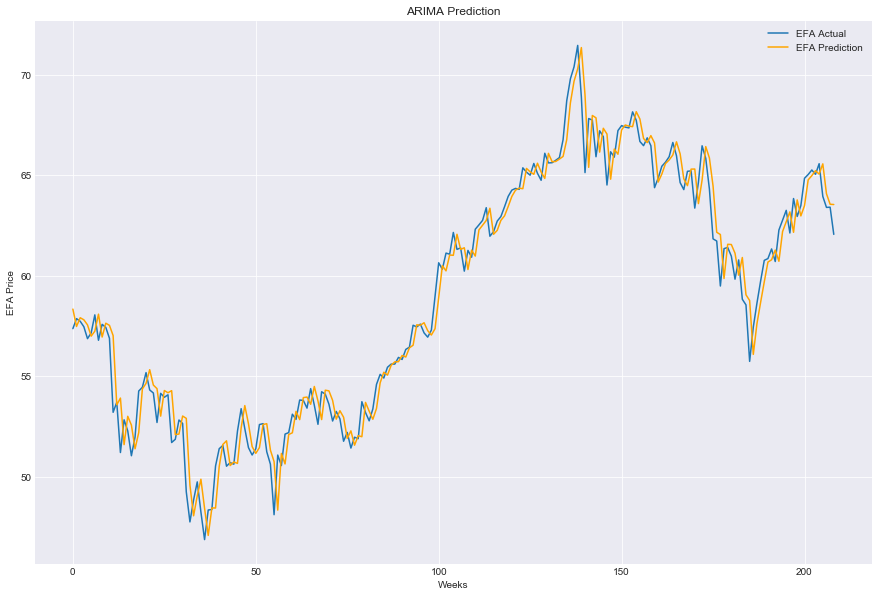

In [10]:
# plot
fig= plt.figure(figsize=(15,10))
plt.plot(test, label = 'EFA Actual')
plt.plot(predictions, color='orange', label = 'EFA Prediction')
plt.xlabel('Weeks')
plt.ylabel('EFA Price')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [11]:
ARIMA_pred_EFA = pd.DataFrame(predictions) 
ARIMA_pred_EFA.columns = ['ARIMA_pred_EFA']
%store ARIMA_pred_EFA

Stored 'ARIMA_pred_EFA' (DataFrame)
